In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/pit/math/mutations.csv', error_bad_lines=False, names = ["Class", "Package", "gc1", "gc2","gc3","Coverage","gc4"])

In [3]:
df.head()

,Class,Package,gc1,gc2,gc3,Coverage,gc4
0,FastMath.java,org.apache.commons.math3.util.FastMath,org.pitest.mutationtest.engine.gregor.mutators...,IEEEremainder,3729,KILLED,org.apache.commons.math3.util.FastMathStrictCo...
1,FastMath.java,org.apache.commons.math3.util.FastMath,org.pitest.mutationtest.engine.gregor.mutators...,abs,3125,KILLED,org.apache.commons.math3.util.FastMathTest.tes...
2,FastMath.java,org.apache.commons.math3.util.FastMath,org.pitest.mutationtest.engine.gregor.mutators...,abs,3125,KILLED,org.apache.commons.math3.util.FastMathTest.tes...
3,FastMath.java,org.apache.commons.math3.util.FastMath,org.pitest.mutationtest.engine.gregor.mutators...,abs,3116,KILLED,org.apache.commons.math3.util.FastMathStrictCo...
4,FastMath.java,org.apache.commons.math3.util.FastMath,org.pitest.mutationtest.engine.gregor.mutators...,abs,3116,KILLED,org.apache.commons.math3.util.FastMathStrictCo...


In [4]:
df.drop('gc1', axis=1, inplace=True)
df.drop('gc2', axis=1, inplace=True)
df.drop('gc3', axis=1, inplace=True)
df.drop('gc4', axis=1, inplace=True)
df['Package'] = df['Package'].map(lambda x: str(x)[:x.rfind('.')])
df['Package'] = df['Package'].map(lambda x:  x if (x.find('$')+1 == 0) else  x[:x.find('$')+1] )
df['Class'] = df['Class'].map(lambda x: str(x)[:x.rfind('.java')])
df.rename(columns={'Class':'CLASS',
                          'Package':'PACKAGE'},
                 inplace=True)
df.head()


,CLASS,PACKAGE,Coverage
0,FastMath,org.apache.commons.math3.util,KILLED
1,FastMath,org.apache.commons.math3.util,KILLED
2,FastMath,org.apache.commons.math3.util,KILLED
3,FastMath,org.apache.commons.math3.util,KILLED
4,FastMath,org.apache.commons.math3.util,KILLED


In [5]:
df = df.groupby(['CLASS','PACKAGE','Coverage'],as_index = False).size().unstack(fill_value=0)
df.head()

Coverage                                                                          KILLED  \
CLASS                         PACKAGE                                                      
AVLTree                       org.apache.commons.math3.geometry.partitioning....     100   
Abs                           org.apache.commons.math3.analysis.function               0   
AbstractConvergenceChecker    org.apache.commons.math3.optim                           2   
                              org.apache.commons.math3.optimization                    2   
AbstractConvexHullGenerator2D org.apache.commons.math3.geometry.euclidean.two...       5   

Coverage                                                                          MEMORY_ERROR  \
CLASS                         PACKAGE                                                            
AVLTree                       org.apache.commons.math3.geometry.partitioning....             0   
Abs                           org.apache.commons.math3.analysis.function                     0   
AbstractConvergenceChecker    org.apache.commons.math3.optim                                 0   
                              org.apache.commons.math3.optimization                          0   
AbstractConvexHullGenerator2D org.apache.commons.math3.geometry.euclidean.two...             0   

Coverage                                                                          NO_COVERAGE  \
CLASS                         PACKAGE                                                           
AVLTree                       org.apache.commons.math3.geometry.partitioning....            6   
Abs                           org.apache.commons.math3.analysis.function                    0   
AbstractConvergenceChecker    org.apache.commons.math3.optim                                0   
                              org.apache.commons.math3.optimization                         0   
AbstractConvexHullGenerator2D org.apache.commons.math3.geometry.euclidean.two...            0   

Coverage                                                                          SURVIVED  \
CLASS                         PACKAGE                                                        
AVLTree                       org.apache.commons.math3.geometry.partitioning....        21   
Abs                           org.apache.commons.math3.analysis.function                 1   
AbstractConvergenceChecker    org.apache.commons.math3.optim                             0   
                              org.apache.commons.math3.optimization                      0   
AbstractConvexHullGenerator2D org.apache.commons.math3.geometry.euclidean.two...         1   

Coverage                                                                          TIMED_OUT  
CLASS                         PACKAGE                                                        
AVLTree                       org.apache.commons.math3.geometry.partitioning....          0  
Abs                           org.apache.commons.math3.analysis.function                  0  
AbstractConvergenceChecker    org.apache.commons.math3.optim                              0  
                              org.apache.commons.math3.optimization                       0  
AbstractConvexHullGenerator2D org.apache.commons.math3.geometry.euclidean.two...          0

In [6]:
#Not MEMORY_ERROR
df['Total_Mutant'] =  (df['KILLED'] + df['NO_COVERAGE'] + df['SURVIVED'] + df['TIMED_OUT'] +df['MEMORY_ERROR'])
df['Mutation_Score'] =  ((df['KILLED']+df['TIMED_OUT']+df['MEMORY_ERROR']) / df['Total_Mutant'])*100
print('Total Mutants  '+str(df.Total_Mutant.sum()))


Total Mutants  47990


In [7]:
print('Total Killed  '+str(df.KILLED.sum()+df.TIMED_OUT.sum()+df.MEMORY_ERROR.sum()))

Total Killed  37704


In [8]:
print('Total TIMED_OUT  '+str(df.TIMED_OUT.sum()))

Total TIMED_OUT  617


In [9]:
print('Mutation Score  '+str((df.KILLED.sum()/df.Total_Mutant.sum())*100))
#df.reset_index()
#df.columns.tolist()

Mutation Score  77.26609710356325


In [25]:
df.to_csv('data.csv')
from google.colab import files
#files.download("data.csv")
df = pd.read_csv('data.csv', error_bad_lines=False)
df.head(100)


,Unnamed: 0,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
0,0,AVLTree,org.apache.commons.math3.geometry.partitioning...,100,0,6,21,0,127,78.740157,28,933,12,134,4,239,13,93,2,27,98.353909,91.780822,106
1,1,Abs,org.apache.commons.math3.analysis.function,0,0,0,1,0,1,0.000000,0,6,0,0,0,2,0,2,0,2,100.000000,NaN,2
2,2,AbstractConvergenceChecker,org.apache.commons.math3.optim,2,0,0,0,0,2,100.000000,9,39,0,0,4,14,1,7,1,7,77.777778,NaN,8
3,3,AbstractConvergenceChecker,org.apache.commons.math3.optimization,2,0,0,0,0,2,100.000000,9,39,0,0,4,14,1,7,1,7,77.777778,NaN,8
4,4,AbstractConvexHullGenerator2D,org.apache.commons.math3.geometry.euclidean.tw...,5,0,0,1,0,6,83.333333,0,52,0,2,0,16,0,6,0,5,100.000000,100.000000,6
5,5,AbstractCurveFitter,org.apache.commons.math3.fitting,13,0,0,0,0,13,100.000000,0,131,0,6,0,26,0,13,0,10,100.000000,100.000000,13
6,6,AbstractDifferentiableOptimizer,org.apache.commons.math3.optimization.general,0,0,3,0,0,3,0.000000,37,0,0,0,6,0,4,0,4,0,0.000000,NaN,4
7,7,AbstractDifferentiableUnivariateSolver,org.apache.commons.math3.analysis.solvers,2,0,0,1,0,3,66.666667,6,23,0,0,2,7,1,3,1,3,77.777778,NaN,4
8,8,AbstractEvaluation,org.apache.commons.math3.fitting.leastsquares,10,0,0,0,0,10,100.000000,0,76,0,2,0,18,0,6,0,5,100.000000,100.000000,6
9,9,AbstractFieldIntegrator,org.apache.commons.math3.ode,38,0,2,9,5,54,79.629630,15,572,6,44,3,125,8,48,2,29,97.656250,88.000000,56


In [11]:
df.count()

CLASS             704
PACKAGE           704
KILLED            704
MEMORY_ERROR      704
NO_COVERAGE       704
SURVIVED          704
TIMED_OUT         704
Total_Mutant      704
Mutation_Score    704
dtype: int64

In [12]:
df1 = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/jacoco/math/jacoco/jacoco.csv', error_bad_lines=False)
df1['CLASS'] = df1['CLASS'].map(lambda x:  x if (x.find('.')+1 == 0) else  x[:x.find('.')] )
#aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
df1 = df1.groupby(df1['CLASS']).aggregate(sum).reset_index()
#df1.count()
df1.columns
#df1.head()

Index(['CLASS', 'INSTRUCTION_MISSED', 'INSTRUCTION_COVERED', 'BRANCH_MISSED',
       'BRANCH_COVERED', 'LINE_MISSED', 'LINE_COVERED', 'COMPLEXITY_MISSED',
       'COMPLEXITY_COVERED', 'METHOD_MISSED', 'METHOD_COVERED'],
      dtype='object')

In [0]:
df1['Statement_Percentage'] =  (df1['LINE_COVERED'] / (df1['LINE_COVERED'] + df1['LINE_MISSED'])) * 100

In [0]:
df1['Branch_Percentage'] =  (df1['BRANCH_COVERED'] / (df1['BRANCH_COVERED'] + df1['BRANCH_MISSED'])) * 100

In [15]:
df1['CC'] =  df1['COMPLEXITY_COVERED'] + df1['COMPLEXITY_MISSED'];
df1.CLASS.count()

716

In [16]:
merged_inner = pd.merge(left=df,right=df1, left_on='CLASS', right_on='CLASS')
merged_inner.CLASS.count()

704

In [17]:
df1[(~df1.CLASS.isin(merged_inner.CLASS))&(~df1.CLASS.isin(merged_inner.CLASS))]

,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
32,AbstractUnivariateSolver,0,15,0,0,0,6,0,3,0,3,100.000000,NaN,3
37,Action,9,49,0,0,0,5,2,2,2,2,100.000000,NaN,4
54,AllowedSolution,5,63,0,0,0,6,1,3,1,3,100.000000,NaN,4
55,AlternativeHypothesis,5,43,0,0,0,4,1,3,1,3,100.000000,NaN,4
71,BSPTreeVisitor,5,73,0,0,0,7,1,3,1,3,100.000000,NaN,4
89,BicubicFunction,20,139,4,10,2,21,4,6,0,3,91.304348,71.428571,10
92,BicubicSplineFunction,133,531,4,18,14,72,7,23,3,16,83.720930,81.818182,30
136,ClassicalRungeKuttaIntegrator,0,88,0,0,0,5,0,2,0,2,100.000000,NaN,2
151,ConjugateGradientFormula,9,29,0,0,0,4,2,2,2,2,100.000000,NaN,4
167,DctNormalization,5,33,0,0,0,3,1,3,1,3,100.000000,NaN,4


Difference - Classes not covered in jacoco or PIT

In [18]:
df = merged_inner
df.columns
merged_inner.head()

,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
0,AVLTree,org.apache.commons.math3.geometry.partitioning...,100,0,6,21,0,127,78.740157,28,933,12,134,4,239,13,93,2,27,98.353909,91.780822,106
1,Abs,org.apache.commons.math3.analysis.function,0,0,0,1,0,1,0.000000,0,6,0,0,0,2,0,2,0,2,100.000000,NaN,2
2,AbstractConvergenceChecker,org.apache.commons.math3.optim,2,0,0,0,0,2,100.000000,9,39,0,0,4,14,1,7,1,7,77.777778,NaN,8
3,AbstractConvergenceChecker,org.apache.commons.math3.optimization,2,0,0,0,0,2,100.000000,9,39,0,0,4,14,1,7,1,7,77.777778,NaN,8
4,AbstractConvexHullGenerator2D,org.apache.commons.math3.geometry.euclidean.tw...,5,0,0,1,0,6,83.333333,0,52,0,2,0,16,0,6,0,5,100.000000,100.000000,6


In [19]:
merged_inner.count()

CLASS                   704
PACKAGE                 704
KILLED                  704
MEMORY_ERROR            704
NO_COVERAGE             704
SURVIVED                704
TIMED_OUT               704
Total_Mutant            704
Mutation_Score          704
INSTRUCTION_MISSED      704
INSTRUCTION_COVERED     704
BRANCH_MISSED           704
BRANCH_COVERED          704
LINE_MISSED             704
LINE_COVERED            704
COMPLEXITY_MISSED       704
COMPLEXITY_COVERED      704
METHOD_MISSED           704
METHOD_COVERED          704
Statement_Percentage    704
Branch_Percentage       548
CC                      704
dtype: int64

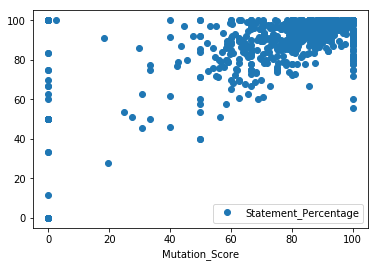

In [20]:
df.plot(x='Mutation_Score', y='Statement_Percentage', style='o')

In [21]:
df[['Mutation_Score','Statement_Percentage']].corr(method ='spearman')

,Mutation_Score,Statement_Percentage
Mutation_Score,1.000000,0.577882
Statement_Percentage,0.577882,1.000000


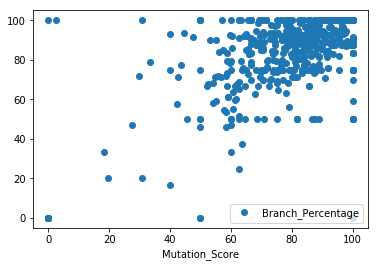

In [22]:
df.plot(x='Mutation_Score', y='Branch_Percentage', style='o')

In [23]:
df[['Mutation_Score','Branch_Percentage']].corr(method ='spearman')

,Mutation_Score,Branch_Percentage
Mutation_Score,1.00000,0.44946
Branch_Percentage,0.44946,1.00000


In [0]:
df.to_csv('math-mu-st-branch.csv')
from google.colab import files
files.download("math-mu-st-branch.csv")